# Working with APIs


## Introduction



So far we have learnt how to obtain data from files and from relational databases. 

However, sometimes the data we need is not readily available via one of these two data sources. In some cases, the data we need may be contained within an *application*. 

Application owners will often create APIs **(or Application Programming Interface)** so that their applications can talk to other applications. 

An **API is a set of programmatic instructions for accessing software applications, and the data that comes from APIs typically contains some sort of structure (such as JSON).** 

This structure makes working with API data preferable to crawling websites and scraping content off of web pages.



In this lesson, we are going to learn:

- How to make API calls to an application;
- Retrieve data in JSON format;
- Learn about API authentication;
- and use Python libraries to obtain data from APIs.

## APIs in General

In [134]:
from IPython.display import YouTubeVideo


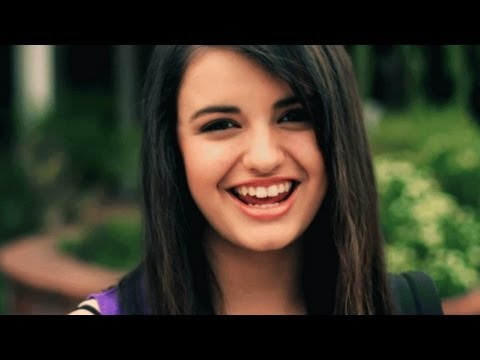

In [137]:
YouTubeVideo('kfVsfOSbJY0', width=800, height=400)

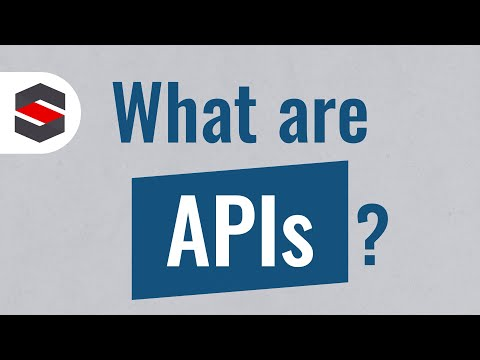

In [138]:
YouTubeVideo('OVvTv9Hy91Q', width=800, height=400)

## Simple API Example Requests



There are a few libraries that can be used for working with APIs in Python, but the Requests library is one of the most intuitive. It has a get() method that allows you to send an HTTP request to an application and receive a response.

In [142]:
import json
import requests

response = requests.get('https://jsonplaceholder.typicode.com/todos')
results = response.json() 


In [143]:
results[0:5]

[{'userId': 1, 'id': 1, 'title': 'delectus aut autem', 'completed': False},
 {'userId': 1,
  'id': 2,
  'title': 'quis ut nam facilis et officia qui',
  'completed': False},
 {'userId': 1, 'id': 3, 'title': 'fugiat veniam minus', 'completed': False},
 {'userId': 1, 'id': 4, 'title': 'et porro tempora', 'completed': True},
 {'userId': 1,
  'id': 5,
  'title': 'laboriosam mollitia et enim quasi adipisci quia provident illum',
  'completed': False}]

In [144]:
results[0]

{'userId': 1, 'id': 1, 'title': 'delectus aut autem', 'completed': False}

In [145]:
results[0].keys()

dict_keys(['userId', 'id', 'title', 'completed'])

In [ ]:
results[0]['title']

In this example, we used the get method to send a request to the JSONPlaceholder API, and we received a response in the form of JSON structured data. 

We can now convert these results into a data frame.

In [146]:
import pandas as pd

data = pd.DataFrame(results)
data.head(10)

,userId,id,title,completed
0,1,1,delectus aut autem,False
1,1,2,quis ut nam facilis et officia qui,False
2,1,3,fugiat veniam minus,False
3,1,4,et porro tempora,True
4,1,5,laboriosam mollitia et enim quasi adipisci qui...,False
5,1,6,qui ullam ratione quibusdam voluptatem quia omnis,False
6,1,7,illo expedita consequatur quia in,False
7,1,8,quo adipisci enim quam ut ab,True
8,1,9,molestiae perspiciatis ipsa,False
9,1,10,illo est ratione doloremque quia maiores aut,True


In [147]:
from pandas.io.json import json_normalize
json_normalize(results)

,userId,id,title,completed
0,1,1,delectus aut autem,False
1,1,2,quis ut nam facilis et officia qui,False
2,1,3,fugiat veniam minus,False
3,1,4,et porro tempora,True
4,1,5,laboriosam mollitia et enim quasi adipisci qui...,False
...,...,...,...,...
195,10,196,consequuntur aut ut fugit similique,True
196,10,197,dignissimos quo nobis earum saepe,True
197,10,198,quis eius est sint explicabo,True
198,10,199,numquam repellendus a magnam,True


### StackAPI

Let's now look at a more realistic example of an API. 

In [148]:
import stackapi
from stackapi import StackAPI

In [149]:
# from stackapi import StackAPI
stack_api = StackAPI('stackoverflow')
questions = stack_api.fetch('questions')

### Here we will be getting a json aswell (like a dictionary)

In [153]:
questions = pd.DataFrame(questions)
questions.head(10)

,backoff,has_more,page,quota_max,quota_remaining,total,items
0,0,True,5,300,300,0,"{'tags': ['visual-studio', 'visual-c++'], 'own..."
1,0,True,5,300,300,0,"{'tags': ['rust'], 'owner': {'reputation': 275..."
2,0,True,5,300,300,0,"{'tags': ['sql-server', 'tsql', 'sql-server-20..."
3,0,True,5,300,300,0,"{'tags': ['database', 'firebase', 'flutter', '..."
4,0,True,5,300,300,0,"{'tags': ['advanced-rest-client'], 'owner': {'..."
5,0,True,5,300,300,0,"{'tags': ['javascript', 'google-apps-script', ..."
6,0,True,5,300,300,0,"{'tags': ['c#', 'wpf', 'mvvm'], 'owner': {'rep..."
7,0,True,5,300,300,0,"{'tags': ['python', 'python-3.x', 'subprocess'..."
8,0,True,5,300,300,0,"{'tags': ['java', 'spring', 'maven', 'spring-m..."
9,0,True,5,300,300,0,"{'tags': ['javascript'], 'owner': {'reputation..."


### now it looks like we have dictionaries in each cell of the last column

In [152]:
questions['items'][0]

{'tags': ['visual-studio', 'visual-c++'],
 'owner': {'reputation': 2519,
  'user_id': 1366016,
  'user_type': 'registered',
  'accept_rate': 60,
  'profile_image': 'https://i.stack.imgur.com/6ZjQr.jpg?s=128&g=1',
  'display_name': 'Wheezil',
  'link': 'https://stackoverflow.com/users/1366016/wheezil'},
 'is_answered': False,
 'view_count': 1,
 'answer_count': 0,
 'score': 0,
 'last_activity_date': 1605636039,
 'creation_date': 1605636039,
 'question_id': 64880771,
 'content_license': 'CC BY-SA 4.0',
 'link': 'https://stackoverflow.com/questions/64880771/visual-c-2019-next-search-result-key-binding',
 'title': 'visual C++ 2019 next search result key binding'}

### Trying to make this more understandable I extracted the dataframe out of the dictionary; it's like doing the trannsformation doubly
#### Step one; transform serie into a list

In [154]:
tolist = questions['items'].to_list()

#### Step two; transform "dicted" list into dataframe

In [156]:
newdf =pd.DataFrame.from_dict(tolist)
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
tags                  500 non-null object
owner                 500 non-null object
is_answered           500 non-null bool
view_count            500 non-null int64
answer_count          500 non-null int64
score                 500 non-null int64
last_activity_date    500 non-null int64
creation_date         500 non-null int64
question_id           500 non-null int64
content_license       475 non-null object
link                  500 non-null object
title                 500 non-null object
closed_date           25 non-null float64
last_edit_date        229 non-null float64
closed_reason         25 non-null object
accepted_answer_id    70 non-null float64
bounty_amount         12 non-null float64
bounty_closes_date    12 non-null float64
protected_date        2 non-null float64
dtypes: bool(1), float64(6), int64(6), object(6)
memory usage: 70.9+ KB


In [157]:
newdf.head()

,tags,owner,is_answered,view_count,answer_count,score,last_activity_date,creation_date,question_id,content_license,link,title,closed_date,last_edit_date,closed_reason,accepted_answer_id,bounty_amount,bounty_closes_date,protected_date
0,"[visual-studio, visual-c++]","{'reputation': 2519, 'user_id': 1366016, 'user...",False,1,0,0,1605636039,1605636039,64880771,CC BY-SA 4.0,https://stackoverflow.com/questions/64880771/v...,visual C++ 2019 next search result key binding,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[rust],"{'reputation': 275, 'user_id': 600002, 'user_t...",False,6,0,-1,1605636035,1605635545,64880646,NaN,https://stackoverflow.com/questions/64880646/i...,Ignore some return values from function which ...,1.605636e+09,1.605636e+09,Duplicate,NaN,NaN,NaN,NaN
2,"[sql-server, tsql, sql-server-2017, charindex]","{'reputation': 131, 'user_id': 2336377, 'user_...",False,14,1,0,1605636034,1605621109,64876588,CC BY-SA 4.0,https://stackoverflow.com/questions/64876588/j...,join over charindex is slow,NaN,1.605622e+09,NaN,NaN,NaN,NaN,NaN
3,"[database, firebase, flutter, firebase-storage]","{'reputation': 1, 'user_id': 13181371, 'user_t...",False,6,1,0,1605636033,1605635620,64880675,CC BY-SA 4.0,https://stackoverflow.com/questions/64880675/f...,Flutter - &gt; UploadTask method OnComplete do...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[advanced-rest-client],"{'reputation': 1, 'user_id': 14656859, 'user_t...",False,2,0,0,1605636031,1605636031,64880768,CC BY-SA 4.0,https://stackoverflow.com/questions/64880768/i...,Is there a version of advanced rest client tha...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Or we can try do this altogether
#### serie -> dict -> dataframe

In [160]:
flatten = pd.DataFrame(dict(questions['items'])).transpose()
flatten.head()

,tags,owner,is_answered,view_count,answer_count,score,last_activity_date,creation_date,question_id,content_license,link,title,closed_date,last_edit_date,closed_reason,accepted_answer_id,bounty_amount,bounty_closes_date,protected_date
0,"[visual-studio, visual-c++]","{'reputation': 2519, 'user_id': 1366016, 'user...",False,1,0,0,1605636039,1605636039,64880771,CC BY-SA 4.0,https://stackoverflow.com/questions/64880771/v...,visual C++ 2019 next search result key binding,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[rust],"{'reputation': 275, 'user_id': 600002, 'user_t...",False,6,0,-1,1605636035,1605635545,64880646,NaN,https://stackoverflow.com/questions/64880646/i...,Ignore some return values from function which ...,1605635896,1605636035,Duplicate,NaN,NaN,NaN,NaN
2,"[sql-server, tsql, sql-server-2017, charindex]","{'reputation': 131, 'user_id': 2336377, 'user_...",False,14,1,0,1605636034,1605621109,64876588,CC BY-SA 4.0,https://stackoverflow.com/questions/64876588/j...,join over charindex is slow,NaN,1605621845,NaN,NaN,NaN,NaN,NaN
3,"[database, firebase, flutter, firebase-storage]","{'reputation': 1, 'user_id': 13181371, 'user_t...",False,6,1,0,1605636033,1605635620,64880675,CC BY-SA 4.0,https://stackoverflow.com/questions/64880675/f...,Flutter - &gt; UploadTask method OnComplete do...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[advanced-rest-client],"{'reputation': 1, 'user_id': 14656859, 'user_t...",False,2,0,0,1605636031,1605636031,64880768,CC BY-SA 4.0,https://stackoverflow.com/questions/64880768/i...,Is there a version of advanced rest client tha...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## More Complex API Requests


Sometimes API responses contain data that is nested, and we must find a way to **flatten** the JSON data so that it fits nicely into a data frame. To see this, let us make a call to the GitHub API.

### GithubAPI

Let's now make an API call to the Github public API, create a Pandas data frame from the results, and examine the structure of the data.

In [161]:
response = requests.get('https://api.github.com/events')

data = pd.DataFrame(response.json()) 
data.head(10)

,id,type,actor,repo,payload,public,created_at,org
0,14223357437,PullRequestReviewEvent,"{'id': 6225888, 'login': 'tclune', 'display_lo...","{'id': 195083467, 'name': 'GEOS-ESM/MAPL', 'ur...","{'action': 'created', 'review': {'id': 5326502...",True,2020-11-17T18:05:18Z,"{'id': 36890935, 'login': 'GEOS-ESM', 'gravata..."
1,14223357446,WatchEvent,"{'id': 16148653, 'login': 'TMats', 'display_lo...","{'id': 154189397, 'name': 'lilianweng/transfor...",{'action': 'started'},True,2020-11-17T18:05:18Z,NaN
2,14223357420,PushEvent,"{'id': 64107, 'login': 'patryk', 'display_logi...","{'id': 309231375, 'name': 'helenatuominen/terr...","{'push_id': 6046620867, 'size': 27, 'distinct_...",True,2020-11-17T18:05:18Z,NaN
3,14223357421,CreateEvent,"{'id': 68841150, 'login': 'oleynikov-ap', 'dis...","{'id': 311990426, 'name': 'oleynikov-ap/LibGDX...","{'ref': 'main', 'ref_type': 'branch', 'master_...",True,2020-11-17T18:05:18Z,NaN
4,14223357389,PushEvent,"{'id': 69779780, 'login': 'samhammond87', 'dis...","{'id': 311328892, 'name': 'samhammond87/uber-f...","{'push_id': 6046620854, 'size': 2, 'distinct_s...",True,2020-11-17T18:05:18Z,NaN
5,14223357376,PushEvent,"{'id': 13942667, 'login': 'orgeva', 'display_l...","{'id': 253472367, 'name': 'wix-incubator/wix-r...","{'push_id': 6046620844, 'size': 1, 'distinct_s...",True,2020-11-17T18:05:18Z,"{'id': 37068588, 'login': 'wix-incubator', 'gr..."
6,14223357381,PushEvent,"{'id': 68583221, 'login': 'myreaderx11', 'disp...","{'id': 281318450, 'name': 'myreaderx11/cdn44',...","{'push_id': 6046620850, 'size': 1, 'distinct_s...",True,2020-11-17T18:05:18Z,NaN
7,14223357385,PushEvent,"{'id': 60683584, 'login': 'prakashshubham13', ...","{'id': 313288940, 'name': 'prakashshubham13/ks...","{'push_id': 6046620852, 'size': 1, 'distinct_s...",True,2020-11-17T18:05:18Z,NaN
8,14223357379,PushEvent,"{'id': 72350643, 'login': 'felipegalang', 'dis...","{'id': 313698290, 'name': 'felipegalang/Curric...","{'push_id': 6046620847, 'size': 1, 'distinct_s...",True,2020-11-17T18:05:18Z,NaN
9,14223357370,PushEvent,"{'id': 74113347, 'login': 'commit-b0t', 'displ...","{'id': 310908821, 'name': 'commit-b0t/commit-b...","{'push_id': 6046620839, 'size': 1, 'distinct_s...",True,2020-11-17T18:05:18Z,NaN


Since many of the columns are nested, we are going to do the following: 

- Turn the nested dictionaries into a data frame with a column for each key;
- Assign column names to each column in this new data frame;
- Add these new columns to the original data frame;
- Drop the column with the nested dictionaries.

### More Complex API Requests: One Column

In [164]:
# select the data['actor'] column
data['actor']

0     {'id': 6225888, 'login': 'tclune', 'display_lo...
1     {'id': 16148653, 'login': 'TMats', 'display_lo...
2     {'id': 64107, 'login': 'patryk', 'display_logi...
3     {'id': 68841150, 'login': 'oleynikov-ap', 'dis...
4     {'id': 69779780, 'login': 'samhammond87', 'dis...
5     {'id': 13942667, 'login': 'orgeva', 'display_l...
6     {'id': 68583221, 'login': 'myreaderx11', 'disp...
7     {'id': 60683584, 'login': 'prakashshubham13', ...
8     {'id': 72350643, 'login': 'felipegalang', 'dis...
9     {'id': 74113347, 'login': 'commit-b0t', 'displ...
10    {'id': 74147489, 'login': 'Daarthy', 'display_...
11    {'id': 2608266, 'login': 'robrochta', 'display...
12    {'id': 7604200, 'login': 'hsbadr', 'display_lo...
13    {'id': 20218826, 'login': 'abdatta', 'display_...
14    {'id': 69163185, 'login': 'myreaderx16', 'disp...
15    {'id': 1086734, 'login': 'fengguang', 'display...
16    {'id': 74552432, 'login': 'lntoanid', 'display...
17    {'id': 40355845, 'login': 'garciagenrique'

In [165]:
# convert the data['actor'] column to a dictionary
dict(data['actor'])[0]

{'id': 6225888,
 'login': 'tclune',
 'display_login': 'tclune',
 'gravatar_id': '',
 'url': 'https://api.github.com/users/tclune',
 'avatar_url': 'https://avatars.githubusercontent.com/u/6225888?'}

In [166]:
# create a new data frame 
flatten = pd.DataFrame(dict(data['actor']))
flatten.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
id,6225888,16148653,64107,68841150,69779780,13942667,68583221,60683584,72350643,74113347,...,37936606,38329424,19578350,36754821,53226883,151096,2687598,22916629,13706250,5255924
login,tclune,TMats,patryk,oleynikov-ap,samhammond87,orgeva,myreaderx11,prakashshubham13,felipegalang,commit-b0t,...,github-learning-lab[bot],wenjuanzhang,jdotcms,codeclimate[bot],jpgomezt,froydnj,milesholt,Beussel,hannagabor,llibdude
display_login,tclune,TMats,patryk,oleynikov-ap,samhammond87,orgeva,myreaderx11,prakashshubham13,felipegalang,commit-b0t,...,github-learning-lab,wenjuanzhang,jdotcms,codeclimate,jpgomezt,froydnj,milesholt,Beussel,hannagabor,llibdude
gravatar_id,,,,,,,,,,,...,,,,,,,,,,
url,https://api.github.com/users/tclune,https://api.github.com/users/TMats,https://api.github.com/users/patryk,https://api.github.com/users/oleynikov-ap,https://api.github.com/users/samhammond87,https://api.github.com/users/orgeva,https://api.github.com/users/myreaderx11,https://api.github.com/users/prakashshubham13,https://api.github.com/users/felipegalang,https://api.github.com/users/commit-b0t,...,https://api.github.com/users/github-learning-l...,https://api.github.com/users/wenjuanzhang,https://api.github.com/users/jdotcms,https://api.github.com/users/codeclimate[bot],https://api.github.com/users/jpgomezt,https://api.github.com/users/froydnj,https://api.github.com/users/milesholt,https://api.github.com/users/Beussel,https://api.github.com/users/hannagabor,https://api.github.com/users/llibdude


In [167]:
# transpose flatten

flatten = pd.DataFrame(dict(data['actor'])).transpose()
flatten.head()

,id,login,display_login,gravatar_id,url,avatar_url
0,6225888,tclune,tclune,,https://api.github.com/users/tclune,https://avatars.githubusercontent.com/u/6225888?
1,16148653,TMats,TMats,,https://api.github.com/users/TMats,https://avatars.githubusercontent.com/u/16148653?
2,64107,patryk,patryk,,https://api.github.com/users/patryk,https://avatars.githubusercontent.com/u/64107?
3,68841150,oleynikov-ap,oleynikov-ap,,https://api.github.com/users/oleynikov-ap,https://avatars.githubusercontent.com/u/68841150?
4,69779780,samhammond87,samhammond87,,https://api.github.com/users/samhammond87,https://avatars.githubusercontent.com/u/69779780?


### Given that we generated this dataframe out of one column we will rename new columns to keep it understandable

In [168]:
# save the columns as strings

columns = [str(i) for i in flatten.columns]
columns

['id', 'login', 'display_login', 'gravatar_id', 'url', 'avatar_url']

In [169]:
# rename the columns for actor
# ['id', 'login', 'display_login', 'gravatar_id', 'url', 'avatar_url']

flatten.columns = ['actor' + '_' + colname for colname in columns]
flatten.columns

Index(['actor_id', 'actor_login', 'actor_display_login', 'actor_gravatar_id',
       'actor_url', 'actor_avatar_url'],
      dtype='object')

In [170]:
# add flatten to data using pd.concat

data = pd.concat([data, flatten], axis=1)
data.head()

,id,type,actor,repo,payload,public,created_at,org,actor_id,actor_login,actor_display_login,actor_gravatar_id,actor_url,actor_avatar_url
0,14223357437,PullRequestReviewEvent,"{'id': 6225888, 'login': 'tclune', 'display_lo...","{'id': 195083467, 'name': 'GEOS-ESM/MAPL', 'ur...","{'action': 'created', 'review': {'id': 5326502...",True,2020-11-17T18:05:18Z,"{'id': 36890935, 'login': 'GEOS-ESM', 'gravata...",6225888,tclune,tclune,,https://api.github.com/users/tclune,https://avatars.githubusercontent.com/u/6225888?
1,14223357446,WatchEvent,"{'id': 16148653, 'login': 'TMats', 'display_lo...","{'id': 154189397, 'name': 'lilianweng/transfor...",{'action': 'started'},True,2020-11-17T18:05:18Z,NaN,16148653,TMats,TMats,,https://api.github.com/users/TMats,https://avatars.githubusercontent.com/u/16148653?
2,14223357420,PushEvent,"{'id': 64107, 'login': 'patryk', 'display_logi...","{'id': 309231375, 'name': 'helenatuominen/terr...","{'push_id': 6046620867, 'size': 27, 'distinct_...",True,2020-11-17T18:05:18Z,NaN,64107,patryk,patryk,,https://api.github.com/users/patryk,https://avatars.githubusercontent.com/u/64107?
3,14223357421,CreateEvent,"{'id': 68841150, 'login': 'oleynikov-ap', 'dis...","{'id': 311990426, 'name': 'oleynikov-ap/LibGDX...","{'ref': 'main', 'ref_type': 'branch', 'master_...",True,2020-11-17T18:05:18Z,NaN,68841150,oleynikov-ap,oleynikov-ap,,https://api.github.com/users/oleynikov-ap,https://avatars.githubusercontent.com/u/68841150?
4,14223357389,PushEvent,"{'id': 69779780, 'login': 'samhammond87', 'dis...","{'id': 311328892, 'name': 'samhammond87/uber-f...","{'push_id': 6046620854, 'size': 2, 'distinct_s...",True,2020-11-17T18:05:18Z,NaN,69779780,samhammond87,samhammond87,,https://api.github.com/users/samhammond87,https://avatars.githubusercontent.com/u/69779780?


In [173]:
# drop the 'messy' column

data = data.drop('actor', axis=1)

KeyError: "['actor'] not found in axis"

In [172]:
data.head(10)

,id,type,repo,payload,public,created_at,org,actor_id,actor_login,actor_display_login,actor_gravatar_id,actor_url,actor_avatar_url
0,14223357437,PullRequestReviewEvent,"{'id': 195083467, 'name': 'GEOS-ESM/MAPL', 'ur...","{'action': 'created', 'review': {'id': 5326502...",True,2020-11-17T18:05:18Z,"{'id': 36890935, 'login': 'GEOS-ESM', 'gravata...",6225888,tclune,tclune,,https://api.github.com/users/tclune,https://avatars.githubusercontent.com/u/6225888?
1,14223357446,WatchEvent,"{'id': 154189397, 'name': 'lilianweng/transfor...",{'action': 'started'},True,2020-11-17T18:05:18Z,NaN,16148653,TMats,TMats,,https://api.github.com/users/TMats,https://avatars.githubusercontent.com/u/16148653?
2,14223357420,PushEvent,"{'id': 309231375, 'name': 'helenatuominen/terr...","{'push_id': 6046620867, 'size': 27, 'distinct_...",True,2020-11-17T18:05:18Z,NaN,64107,patryk,patryk,,https://api.github.com/users/patryk,https://avatars.githubusercontent.com/u/64107?
3,14223357421,CreateEvent,"{'id': 311990426, 'name': 'oleynikov-ap/LibGDX...","{'ref': 'main', 'ref_type': 'branch', 'master_...",True,2020-11-17T18:05:18Z,NaN,68841150,oleynikov-ap,oleynikov-ap,,https://api.github.com/users/oleynikov-ap,https://avatars.githubusercontent.com/u/68841150?
4,14223357389,PushEvent,"{'id': 311328892, 'name': 'samhammond87/uber-f...","{'push_id': 6046620854, 'size': 2, 'distinct_s...",True,2020-11-17T18:05:18Z,NaN,69779780,samhammond87,samhammond87,,https://api.github.com/users/samhammond87,https://avatars.githubusercontent.com/u/69779780?
5,14223357376,PushEvent,"{'id': 253472367, 'name': 'wix-incubator/wix-r...","{'push_id': 6046620844, 'size': 1, 'distinct_s...",True,2020-11-17T18:05:18Z,"{'id': 37068588, 'login': 'wix-incubator', 'gr...",13942667,orgeva,orgeva,,https://api.github.com/users/orgeva,https://avatars.githubusercontent.com/u/13942667?
6,14223357381,PushEvent,"{'id': 281318450, 'name': 'myreaderx11/cdn44',...","{'push_id': 6046620850, 'size': 1, 'distinct_s...",True,2020-11-17T18:05:18Z,NaN,68583221,myreaderx11,myreaderx11,,https://api.github.com/users/myreaderx11,https://avatars.githubusercontent.com/u/68583221?
7,14223357385,PushEvent,"{'id': 313288940, 'name': 'prakashshubham13/ks...","{'push_id': 6046620852, 'size': 1, 'distinct_s...",True,2020-11-17T18:05:18Z,NaN,60683584,prakashshubham13,prakashshubham13,,https://api.github.com/users/prakashshubham13,https://avatars.githubusercontent.com/u/60683584?
8,14223357379,PushEvent,"{'id': 313698290, 'name': 'felipegalang/Curric...","{'push_id': 6046620847, 'size': 1, 'distinct_s...",True,2020-11-17T18:05:18Z,NaN,72350643,felipegalang,felipegalang,,https://api.github.com/users/felipegalang,https://avatars.githubusercontent.com/u/72350643?
9,14223357370,PushEvent,"{'id': 310908821, 'name': 'commit-b0t/commit-b...","{'push_id': 6046620839, 'size': 1, 'distinct_s...",True,2020-11-17T18:05:18Z,NaN,74113347,commit-b0t,commit-b0t,,https://api.github.com/users/commit-b0t,https://avatars.githubusercontent.com/u/74113347?


### More Complex API Requests: For Loop 



Most data types of these kinds have more than one condensed column. In that case, it is useful to simply loop over those columns for which this holds.

In [174]:
# Reinitialise the data
response = requests.get('https://api.github.com/events')
data = pd.DataFrame(response.json())

In [175]:
data.head(10)

,id,type,actor,repo,payload,public,created_at,org
0,14223497194,DeleteEvent,"{'id': 249955, 'login': 'SergeyZh', 'display_l...","{'id': 2209077, 'name': 'JetBrains/MPS', 'url'...","{'ref': '3.3.3', 'ref_type': 'tag', 'pusher_ty...",True,2020-11-17T18:17:21Z,"{'id': 878437, 'login': 'JetBrains', 'gravatar..."
1,14223497181,PushEvent,"{'id': 57268788, 'login': 'myreaderx', 'displa...","{'id': 279286327, 'name': 'myreaderx/cdn0', 'u...","{'push_id': 6046690075, 'size': 1, 'distinct_s...",True,2020-11-17T18:17:21Z,NaN
2,14223497179,PushEvent,"{'id': 4840385, 'login': 'ZeynelErdiKarabulut'...","{'id': 313703695, 'name': 'ZeynelErdiKarabulut...","{'push_id': 6046690081, 'size': 1, 'distinct_s...",True,2020-11-17T18:17:21Z,NaN
3,14223497173,PushEvent,"{'id': 59161083, 'login': '99sphere', 'display...","{'id': 291261704, 'name': 'DGIST-ARTIV/dgist-a...","{'push_id': 6046690076, 'size': 1, 'distinct_s...",True,2020-11-17T18:17:21Z,"{'id': 67869616, 'login': 'DGIST-ARTIV', 'grav..."
4,14223497184,PushEvent,"{'id': 74113347, 'login': 'commit-b0t', 'displ...","{'id': 310908821, 'name': 'commit-b0t/commit-b...","{'push_id': 6046690077, 'size': 1, 'distinct_s...",True,2020-11-17T18:17:21Z,NaN
5,14223497190,CreateEvent,"{'id': 57788692, 'login': 'Anseong5', 'display...","{'id': 313702432, 'name': 'Anseong5/eclipsegit...","{'ref': 'master', 'ref_type': 'branch', 'maste...",True,2020-11-17T18:17:21Z,NaN
6,14223497175,CreateEvent,"{'id': 30299318, 'login': 'ronniemikihiro', 'd...","{'id': 313705156, 'name': 'ronniemikihiro/micr...","{'ref': None, 'ref_type': 'repository', 'maste...",True,2020-11-17T18:17:21Z,NaN
7,14223497165,PushEvent,"{'id': 2322354, 'login': 'ItsJonQ', 'display_l...","{'id': 275430248, 'name': 'ItsJonQ/g2', 'url':...","{'push_id': 6046690067, 'size': 1, 'distinct_s...",True,2020-11-17T18:17:21Z,NaN
8,14223497164,PullRequestReviewEvent,"{'id': 37936606, 'login': 'github-learning-lab...","{'id': 313699170, 'name': 'perezjm163/intro-ht...","{'action': 'created', 'review': {'id': 5326600...",True,2020-11-17T18:17:21Z,NaN
9,14223497151,IssueCommentEvent,"{'id': 24897554, 'login': 'SL-CodeBlaster', 'd...","{'id': 310894396, 'name': 'SL-CodeBlaster/reac...","{'action': 'created', 'issue': {'url': 'https:...",True,2020-11-17T18:17:21Z,NaN


In [176]:
# select the columns that contain a dictionary
col_list = ['actor', 'org', 'payload', 'repo']

In [177]:
# Create a for-loop to loop over the columns
# col_list = ['actor', 'org', 'payload', 'repo']

for column in col_list:
    flattened = pd.DataFrame(dict(data[column])).transpose()
    columns = [str(col) for col in flattened.columns]
    flattened.columns = [column + '_' + colname for colname in columns]
    data = pd.concat([data, flattened], axis=1)
    data = data.drop(column, axis=1)

### Note for reusing this function; it will expect a dataframe named "data"

In [178]:
data.head()

,id,type,public,created_at,actor_id,actor_login,actor_display_login,actor_gravatar_id,actor_url,actor_avatar_url,...,payload_description,payload_action,payload_review,payload_pull_request,payload_issue,payload_comment,payload_number,repo_id,repo_name,repo_url
0,14223497194,DeleteEvent,True,2020-11-17T18:17:21Z,249955,SergeyZh,SergeyZh,,https://api.github.com/users/SergeyZh,https://avatars.githubusercontent.com/u/249955?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209077,JetBrains/MPS,https://api.github.com/repos/JetBrains/MPS
1,14223497181,PushEvent,True,2020-11-17T18:17:21Z,57268788,myreaderx,myreaderx,,https://api.github.com/users/myreaderx,https://avatars.githubusercontent.com/u/57268788?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,279286327,myreaderx/cdn0,https://api.github.com/repos/myreaderx/cdn0
2,14223497179,PushEvent,True,2020-11-17T18:17:21Z,4840385,ZeynelErdiKarabulut,ZeynelErdiKarabulut,,https://api.github.com/users/ZeynelErdiKarabulut,https://avatars.githubusercontent.com/u/4840385?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,313703695,ZeynelErdiKarabulut/PythonTensorFlow,https://api.github.com/repos/ZeynelErdiKarabul...
3,14223497173,PushEvent,True,2020-11-17T18:17:21Z,59161083,99sphere,99sphere,,https://api.github.com/users/99sphere,https://avatars.githubusercontent.com/u/59161083?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,291261704,DGIST-ARTIV/dgist-artiv.github.io,https://api.github.com/repos/DGIST-ARTIV/dgist...
4,14223497184,PushEvent,True,2020-11-17T18:17:21Z,74113347,commit-b0t,commit-b0t,,https://api.github.com/users/commit-b0t,https://avatars.githubusercontent.com/u/74113347?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,310908821,commit-b0t/commit-b0t,https://api.github.com/repos/commit-b0t/commit...


### More Complex API Requests: Function 



We can also write a function that does this for us. Using a function allows us to return a new data frame without actually interfering upon the original one. 

In [ ]:
# Reinitialise the data
response = requests.get('https://api.github.com/events')
data = pd.DataFrame(response.json())

### This is the same as before but with a function

In [179]:
def flatten(data, col_list):
    for column in col_list:
        flattened = pd.DataFrame(dict(data[column])).transpose()
        columns = [str(col) for col in flattened.columns]
        flattened.columns = [column + '_' + colname for colname in columns]
        data = pd.concat([data, flattened], axis=1)
        data = data.drop(column, axis=1)
    return data

In [181]:
data.head(5)

,id,type,public,created_at,actor_id,actor_login,actor_display_login,actor_gravatar_id,actor_url,actor_avatar_url,...,payload_description,payload_action,payload_review,payload_pull_request,payload_issue,payload_comment,payload_number,repo_id,repo_name,repo_url
0,14223497194,DeleteEvent,True,2020-11-17T18:17:21Z,249955,SergeyZh,SergeyZh,,https://api.github.com/users/SergeyZh,https://avatars.githubusercontent.com/u/249955?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209077,JetBrains/MPS,https://api.github.com/repos/JetBrains/MPS
1,14223497181,PushEvent,True,2020-11-17T18:17:21Z,57268788,myreaderx,myreaderx,,https://api.github.com/users/myreaderx,https://avatars.githubusercontent.com/u/57268788?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,279286327,myreaderx/cdn0,https://api.github.com/repos/myreaderx/cdn0
2,14223497179,PushEvent,True,2020-11-17T18:17:21Z,4840385,ZeynelErdiKarabulut,ZeynelErdiKarabulut,,https://api.github.com/users/ZeynelErdiKarabulut,https://avatars.githubusercontent.com/u/4840385?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,313703695,ZeynelErdiKarabulut/PythonTensorFlow,https://api.github.com/repos/ZeynelErdiKarabul...
3,14223497173,PushEvent,True,2020-11-17T18:17:21Z,59161083,99sphere,99sphere,,https://api.github.com/users/99sphere,https://avatars.githubusercontent.com/u/59161083?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,291261704,DGIST-ARTIV/dgist-artiv.github.io,https://api.github.com/repos/DGIST-ARTIV/dgist...
4,14223497184,PushEvent,True,2020-11-17T18:17:21Z,74113347,commit-b0t,commit-b0t,,https://api.github.com/users/commit-b0t,https://avatars.githubusercontent.com/u/74113347?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,310908821,commit-b0t/commit-b0t,https://api.github.com/repos/commit-b0t/commit...


In [180]:
# Call the function flatten
nested_columns = ['actor', 'org', 'payload', 'repo']

flat = flatten(data, nested_columns)

KeyError: 'actor'

In [ ]:
# display here
flat.head(10)

### More Complex API Requests: JSON_Normalise Function  


Alternatively, we can flatten nested data using the function json_normalize. This function is part of the Pandas library. 



Here is an example of how to use this function. 

In [182]:
from pandas.io.json import json_normalize

results = response.json()
results[0]

{'id': '14223497194',
 'type': 'DeleteEvent',
 'actor': {'id': 249955,
  'login': 'SergeyZh',
  'display_login': 'SergeyZh',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/SergeyZh',
  'avatar_url': 'https://avatars.githubusercontent.com/u/249955?'},
 'repo': {'id': 2209077,
  'name': 'JetBrains/MPS',
  'url': 'https://api.github.com/repos/JetBrains/MPS'},
 'payload': {'ref': '3.3.3', 'ref_type': 'tag', 'pusher_type': 'user'},
 'public': True,
 'created_at': '2020-11-17T18:17:21Z',
 'org': {'id': 878437,
  'login': 'JetBrains',
  'gravatar_id': '',
  'url': 'https://api.github.com/orgs/JetBrains',
  'avatar_url': 'https://avatars.githubusercontent.com/u/878437?'}}

In [183]:
flattened_data = json_normalize(results)
flattened_data.head()

,id,type,public,created_at,actor.id,actor.login,actor.display_login,actor.gravatar_id,actor.url,actor.avatar_url,...,payload.pull_request.comments,payload.pull_request.review_comments,payload.pull_request.maintainer_can_modify,payload.pull_request.commits,payload.pull_request.additions,payload.pull_request.deletions,payload.pull_request.changed_files,payload.pull_request.merged_by,payload.pull_request.head.repo.license,payload.pull_request.base.repo.license
0,14223497194,DeleteEvent,True,2020-11-17T18:17:21Z,249955,SergeyZh,SergeyZh,,https://api.github.com/users/SergeyZh,https://avatars.githubusercontent.com/u/249955?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14223497181,PushEvent,True,2020-11-17T18:17:21Z,57268788,myreaderx,myreaderx,,https://api.github.com/users/myreaderx,https://avatars.githubusercontent.com/u/57268788?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14223497179,PushEvent,True,2020-11-17T18:17:21Z,4840385,ZeynelErdiKarabulut,ZeynelErdiKarabulut,,https://api.github.com/users/ZeynelErdiKarabulut,https://avatars.githubusercontent.com/u/4840385?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14223497173,PushEvent,True,2020-11-17T18:17:21Z,59161083,99sphere,99sphere,,https://api.github.com/users/99sphere,https://avatars.githubusercontent.com/u/59161083?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14223497184,PushEvent,True,2020-11-17T18:17:21Z,74113347,commit-b0t,commit-b0t,,https://api.github.com/users/commit-b0t,https://avatars.githubusercontent.com/u/74113347?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Important**: Sometimes multiple rounds of flattening will be required if the JSON data returned from the API you are working with has hierarchically nested data.

## Summary

In this lesson, we covered:


- The basics of working with APIs and API libraries;

- How to work with more complex API calls;

- How to flatten JSON-structured data. 

# API Wrappers
## LESSON GOALS
Understand what is API wrapper
Learn how to use the Twitter API wrapper
## INTRODUCTION - AUTHENTICATION AND PYTHON API WRAPPERS
Most application that you will want to request data from (social networks, search engines, etc.) will want to know who is accessing their application, how they plan on doing so, and what they plan to do with the data.

For these popular applications, there are also Python wrappers that have been written for their APIs that make interacting with them much easier than it would be otherwise.

Access Twitter API using Python
One example is the tweepy library that makes obtaining data from the Twitter API relatively simple.

Before we can use it, we need to create a developer account (if we don't already have one, create an application, and obtain credentials from Twitter. To create a developer account, follow the steps below.

Go to https://developer.twitter.com/en/apply-for-access.html.
Click Apply for a developer account.
Follow the instructions and provide the information necessary to create a developer account for personal use.
Twitter will review your application and approve your account (assuming you didn't say you would do anything that violates their terms of service).
After receiving confirmation that your developer account has been approved, you must create an application by logging into your account and following the steps to create a new app. Once the app has been created, the next step is to obtain your credentials. These credentials will give you permission to access the Twitter API. The credentials consist of an API key, API secret key, access token, and access token secret. They can be found by viewing the details of your app and clicking on the Keys and Tokens tab.

Warning: You should store your credentials in a safe place, never share them, and never upload them to Github.

Now that we have obtained our credentials, we can use tweepy to access the Twitter API as follows. You will need to replace the credentials below with your actual credentials for this code to function.



In [184]:
import tweepy 

In [185]:
#Fake credentials; create yours by following the steps in the text up here.
API_KEY = "ItsFriday"
API_SECRET = "IronhackRocks"
ACCESS_TOKEN = "FillOutTheNPS"
ACCESS_TOKEN_SECRET = "RebeccaBlackForTheWin"

auth = tweepy.OAuthHandler(API_KEY, API_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)

In [186]:
auth = tweepy.OAuthHandler(API_KEY, API_SECRET)


In [187]:
redirect_url = auth.get_authorization_url()
print(redirect_url)

https://api.twitter.com/oauth/authorize?oauth_token=pd7AYwAAAAABJ1ynAAABddeJFNk


In [188]:
print(auth.access_token, auth.access_token_secret)

None None


In [189]:
api = tweepy.API(auth)
for tweet in tweepy.Cursor(api.search, q='ironhack').items(10):
    print(tweet.text)

@OfferUpSupport is the ironhack x offerup scholarship international??
@offerup @ironhack @IronhackMIA Is this international??
ICYMI: Catching up with Ariel Quinones on Ironhack's growth during COVID and their newest funding round… https://t.co/7B7EGQg6by
A escola de tecnologia Ironhack tem candidaturas a decorrer para cursos intensivos de web development e data analyt… https://t.co/bszk2d09pR
A escola de tecnologia Ironhack tem candidaturas a decorrer para cursos intensivos de web development e data analyt… https://t.co/QdpDm00DqM
💰160 000 € DE BOURSES 💰 Devenez UX/UI Designer, Web Developer ou Data Analyst grâce aux formations @IronhackPAR en… https://t.co/15Y3aM473P
⁠Work for 25 minutes and then take a 5minute break (indicated by a party song!) &amp; repeat. After two hours, you take… https://t.co/v5uf6Rzo3W
📣Last call! ➡We’re offering over $200,000 in exclusive #scholarships to study Web Development, #DataAnalytics , Cyb… https://t.co/HquO7PdcGN
🙋‍♀️📣¡Último día para solicitarlas! ➡

In [190]:
api = tweepy.API(auth)
for tweet in tweepy.Cursor(api.search, q='dcdc').items(10):
    print(tweet.text)

Guidance for the Use of Face Coverings https://t.co/sA71nkHivl
全国で出稼ぎのご紹介が可能です☆
店舗との関係も親密なので、保証額の交渉もお任せ下さい！他社より1～2万高い保証額をお出し致します♪
是非弊社にお任せ下さい(*'▽')
LINE ID⇒f-s-a. https://t.co/AW4mGpfm42
@awygle Haha well... :). I burned the DCDC converters on my NeTV2 because of a bad power supply (that suddenly gave… https://t.co/stLOr1r4rH
RT @CountyElDorado: Effective at NOON Nov. 17th, #ElDoradoCountyCA is in the most restrictive #COVID19 tier. For more information on the Ti…
California Department of Public Health https://t.co/Trcmstm8hI
RT @CAPublicHealth: #CA flattened the curve before and we can do it again when everyone does their part:
-Wash your hands
-Wear a face cove…
RT @sccounty: Effective immediately, Santa Cruz County has been placed into the purple tier under the state's Blueprint for a Safer Economy…
@Metrolink @Amtrak This is a state mandate so I believe you need to follow it, in addition to CDC guidelines. Here… https://t.co/NHUt8yputn
RT @sccounty: Effective immediately, Santa Cru

In [191]:
api.user_timeline(id="twitter")

[Status(_api=<tweepy.api.API object at 0x7ff7a172bf50>, _json={'created_at': 'Tue Nov 17 13:00:18 +0000 2020', 'id': 1328684389388185600, 'id_str': '1328684389388185600', 'text': 'That thing you didn’t Tweet but wanted to but didn’t but got so close but then were like nah. \n\nWe have a place for… https://t.co/7JE9o0zAAq', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/7JE9o0zAAq', 'expanded_url': 'https://twitter.com/i/web/status/1328684389388185600', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://www.sprinklr.com" rel="nofollow">Sprinklr</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 783214, 'id_str': '783214', 'name': 'Twitter', 'screen_name': 'Twitter', 'location': 'everywhere', 'description': "What's happening!?", 'url': 'https:/

In [192]:
api.user_timeline(id="ironhack")


[Status(_api=<tweepy.api.API object at 0x7ff7a172bf50>, _json={'created_at': 'Tue Nov 17 11:38:00 +0000 2020', 'id': 1328663675151011840, 'id_str': '1328663675151011840', 'text': '\u2060Work for 25 minutes and then take a 5minute break (indicated by a party song!) &amp; repeat. After two hours, you take… https://t.co/v5uf6Rzo3W', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/v5uf6Rzo3W', 'expanded_url': 'https://twitter.com/i/web/status/1328663675151011840', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [121, 144]}]}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1551130856, 'id_str': '1551130856', 'name': 'Ironhack', 'screen_name': 'ironhack', 'location': 'Remote', 'description': 'International 